# How Are France and Germany Handling the Coronavirus Crisis? 
# Perspective from a Germany-based French Woman

This piece of code was used for writing the following article:
https://medium.com/@marie.lefevre/how-are-france-and-germany-handling-the-coronavirus-crisis-20c8cb5d3690


## Import packages and datasets

In [1]:
# Import packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
import plotly.express as px
%matplotlib notebook

# Import datasets
url_frde = "https://raw.githubusercontent.com/marie-lefevre/Coronavirus-Crisis/master/France-Germany/corona_frde_csv.csv"
corona_frde = pd.read_csv(url_frde, error_bad_lines=False)
url_eu_part = "https://raw.githubusercontent.com/marie-lefevre/Coronavirus-Crisis/master/France-Germany/corona_eu_part_csv.csv"
corona_eu_part = pd.read_csv(url_eu_part, error_bad_lines=False)
df_frde = corona_frde.copy()
df_frde["Date"] = df_frde["Date"].apply(lambda x: 
                                    dt.datetime.strptime(x,'%d/%m/%Y'))
df_eu_part = corona_eu_part.copy()

## Chart 1: Number of Coronavirus Cases in France and Germany

<IPython.core.display.Javascript object>


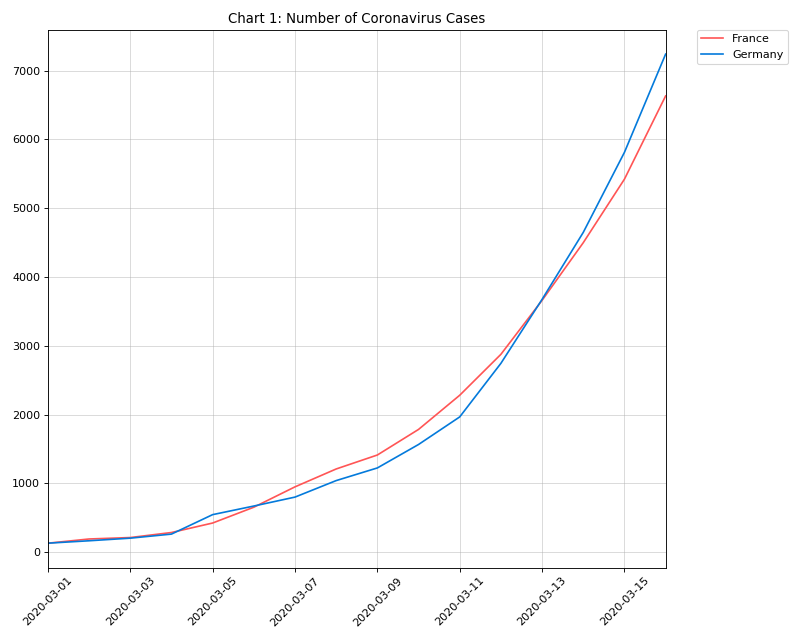

In [2]:
# Create chart 1
df_frde_total = df_frde[["France total cases","Germany total cases","Date"]]

plt.figure(figsize=(10,8), dpi= 80)
day = df_frde["Date"]
y_fr = df_frde["France total cases"]
y_de = df_frde["Germany total cases"]
plt.grid(alpha=0.5)
plt.xticks(rotation=45)
plt.plot(day, y_fr, color='#FF5555', label = "France")
plt.plot(day, y_de, color='#047ADB', label = "Germany")
plt.xlim([min(day),max(day)])
plt.title('Chart 1: Number of Coronavirus Cases')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()

plt.show()

## Chart 2: Number of Coronavirus-related Deaths in France and Germany

<IPython.core.display.Javascript object>


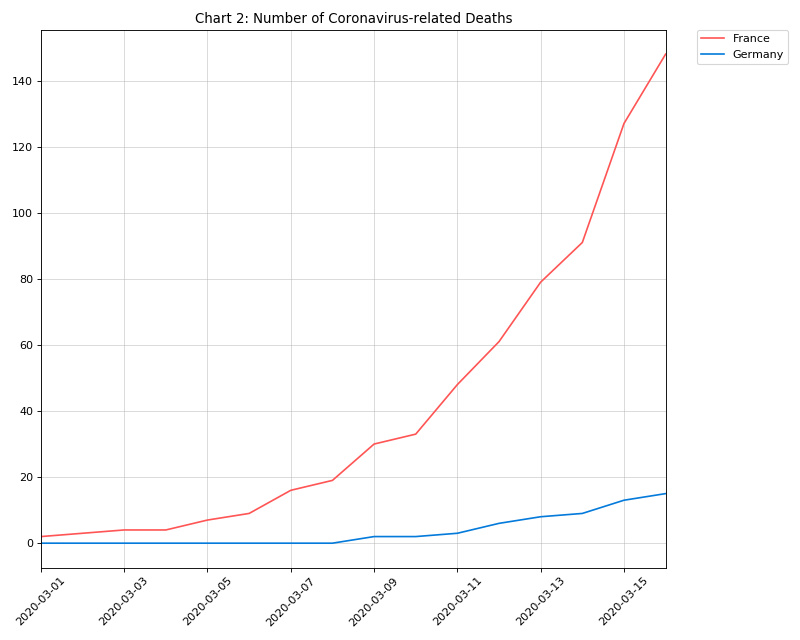

In [3]:
# Create chart 2
df_frde_deaths = df_frde[["France deaths","Germany deaths","Date"]]

plt.figure(figsize=(10,8), dpi= 80)
day = df_frde["Date"]
y_fr = df_frde["France deaths"]
y_de = df_frde["Germany deaths"]
plt.grid(alpha=0.5)
plt.xticks(rotation=45)
plt.plot(day, y_fr, color='#FF5555', label = "France")
plt.plot(day, y_de, color='#047ADB', label = "Germany")
plt.xlim([min(day),max(day)])
plt.title('Chart 2: Number of Coronavirus-related Deaths')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()

plt.show()

## Chart 4: Statistics in Selected European Countries

In [4]:
# Create chart 4: Statistics per country
df_eu_part["Total cases / 1M pop."] = (df_eu_part["Total cases"] / (df_eu_part["Population"]/1000000)).round(1) 
df_eu_part = df_eu_part.sort_values(by=['Total cases'], ascending=False)
df_eu_part["Population"] = df_eu_part.apply(lambda x: "{:,}".format(x['Population']), axis=1)
df_eu_part["Total cases"] = df_eu_part.apply(lambda x: "{:,}".format(x['Total cases']), axis=1)

df_eu_part

,Country,Population,Total cases,Total cases / 1M pop.
2,Italy,"60,461,826","27,980",462.8
1,Germany,"83,783,942","7,241",86.4
0,France,"65,273,511","6,633",101.6
3,Switzerland,"8,654,622","2,353",271.9
6,Netherlands,"17,134,872","1,413",82.5
5,Belgium,"11,589,623","1,058",91.3
7,Austria,"9,006,398","1,018",113.0
4,Luxembourg,"625,978",81,129.4


## Chart 5: Map of Coronavirus Cases in Selected European Countries

In [6]:
# Create chart 5: Number of Coronavirus cases in selected countries
df_eu_part = corona_eu_part.copy()
df_eu_part["Country"] = ["FRA", "DEU", "ITA", "CHE", "LUX", "BEL", "NLD", "AUT"]
df_eu_part["Total cases / 1M pop."] = (df_eu_part["Total cases"] / (df_eu_part["Population"]/1000000)).round(1) 
df_eu_part = df_eu_part.sort_values(by=['Total cases'], ascending=False)

fig = px.choropleth(df_eu_part, 
                    locations='Country', 
                    color='Total cases',
                    #color_discrete_sequence=["#00CC93", "#636EFA", "#EF553B"],
                    color_continuous_scale="YlOrRd",
                    scope="europe",
                    hover_name="Country",
                    hover_data = ["Population", "Total cases"]
                    )
fig.update_layout(
    title_text = "Number of Coronavirus cases in selected countries"
                 )
    
fig.show()